In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-darkgrid")

## Tabla Fletes

Esta tabla describe todos los transportistas disponibles, los rangos de peso para cada ruta individual y las tarifas asociadas. 

In [2]:
fletes = pd.read_excel("data.xlsx", sheet_name = "FreightRates")

fletes.columns = ["Transportista", "Puerto de origen", "Puerto de destino", "Peso mínimo [kg/item]", "Peso máximo [kg/item]", 
                  "Nivel de servicio", "Costo mínimo [USD/kg]", "Tasa de flete [USD/kg]", "Modo de transporte", "Envío [días]", 
                  "Tipo de transportista"]

In [3]:
fletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transportista           1540 non-null   object 
 1   Puerto de origen        1540 non-null   object 
 2   Puerto de destino       1540 non-null   object 
 3   Peso mínimo [kg/item]   1540 non-null   float64
 4   Peso máximo [kg/item]   1540 non-null   float64
 5   Nivel de servicio       1540 non-null   object 
 6   Costo mínimo [USD/kg]   1540 non-null   float64
 7   Tasa de flete [USD/kg]  1540 non-null   float64
 8   Modo de transporte      1540 non-null   object 
 9   Envío [días]            1540 non-null   int64  
 10  Tipo de transportista   1540 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 132.5+ KB


*¿La tabla contiene filas duplicadas?*

In [4]:
fletes.duplicated().any()

True

*Si la tabla tiene filas duplicadas, estas deben ser eliminadas.*

In [5]:
fletes.drop_duplicates(inplace = True)

In [6]:
fletes[["Puerto de origen", "Puerto de destino"]] = fletes[["Puerto de origen", 
                                                            "Puerto de destino"]].replace({"[^\d.]": ""}, regex = True).astype(int)
fletes["Modo de transporte"] = fletes["Modo de transporte"].replace({"AIR   ": "Aire", "GROUND": "Tierra"}, regex = True)

fletes.round(2).head()

,Transportista,Puerto de origen,Puerto de destino,Peso mínimo [kg/item],Peso máximo [kg/item],Nivel de servicio,Costo mínimo [USD/kg],Tasa de flete [USD/kg],Modo de transporte,Envío [días],Tipo de transportista
0,V444_6,8,9,250.0,499.99,DTD,43.23,0.71,Aire,2,V88888888_0
1,V444_6,8,9,65.0,69.99,DTD,43.23,0.75,Aire,2,V88888888_0
2,V444_6,8,9,60.0,64.99,DTD,43.23,0.79,Aire,2,V88888888_0
3,V444_6,8,9,50.0,54.99,DTD,43.23,0.83,Aire,2,V88888888_0
4,V444_6,8,9,35.0,39.99,DTD,43.23,1.06,Aire,2,V88888888_0


*¿Cuántas filas y columnas tiene esta tabla? (N°filas, N° columnas)*

In [7]:
fletes.shape

(1537, 11)

*Estadística descriptiva de Tasa de flete [USD/kg] para cada conjunto Puerto de origen y Puerto de destino*

In [8]:
fletes_agrup = fletes.groupby(by = ["Puerto de origen", "Puerto de destino"]).agg({"Tasa de flete [USD/kg]": ["min", "mean", "max", "std"]})
fletes_agrup.round(2)

Tasa de flete [USD/kg]                     
                                                      min  mean     max    std
Puerto de origen Puerto de destino                                            
2                9                                   0.05  1.87    7.06   1.78
3                9                                   0.12  9.84  128.03  19.98
4                9                                   0.04  1.94    7.66   2.05
5                9                                   0.07  2.87   12.07   2.90
6                9                                   0.07  2.53    7.16   1.74
7                9                                   0.14  0.20    0.28   0.04
8                9                                   0.10  0.59    1.83   0.56
9                9                                   0.03  2.84   21.28   6.59
10               9                                   0.10  5.37   18.96   4.99
11               9                                   0.07  0.13    0.34   0.06

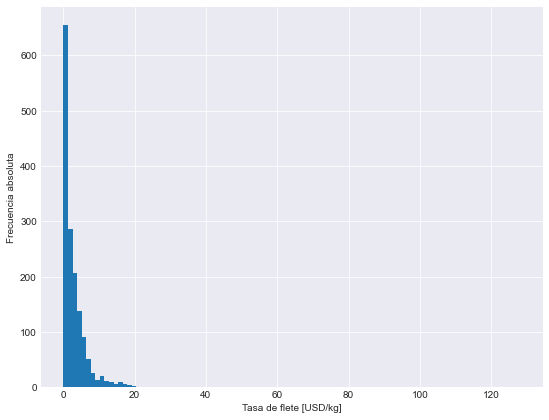

In [9]:
from functions import plot_hist

plot_hist("Tasa de flete [USD/kg]", "Frecuencia absoluta", fletes["Tasa de flete [USD/kg]"], bins = 100)

*Estadística descriptiva de Envío [días] para cada conjunto Puerto de origen y Puerto de destino*

In [10]:
fletes_agrup = fletes.groupby(by = ["Puerto de origen", "Puerto de destino"]).agg({"Envío [días]": ["min", "mean", "max", "size"]})
fletes_agrup.round(2)

Envío [días]               
                                            min  mean max size
Puerto de origen Puerto de destino                            
2                9                            0  1.62  14  226
3                9                            0  3.05  14   42
4                9                            0  1.58  14  231
5                9                            1  1.27   4  219
6                9                            1  1.99   3  479
7                9                            3  4.50   6   20
8                9                            2  4.82  14   39
9                9                            0  4.42  14   24
10               9                            2  3.17   6  222
11               9                            0  5.29  14   35

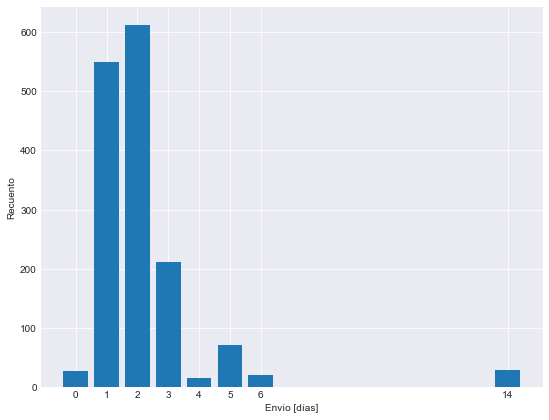

In [11]:
fletes_agrup = fletes.groupby(by = "Envío [días]").agg({"Envío [días]": "size"}).rename(columns = {"Envío [días]": "Recuento"})

from functions import plot_bar

plot_bar("Envío [días]", "Recuento", fletes_agrup.index, fletes_agrup["Recuento"])

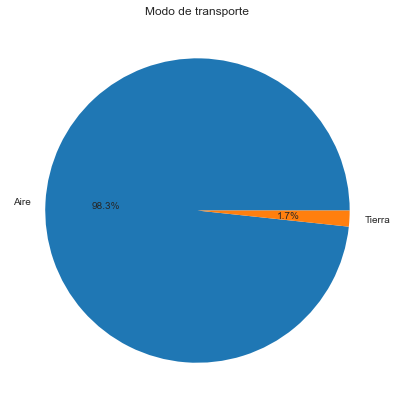

In [12]:
fletes_agrup = fletes.groupby(by = "Modo de transporte").agg({"Puerto de origen": "size"})
fletes_agrup = fletes_agrup.rename(columns = {"Puerto de origen": "Recuento de Puerto de origen"})

plt.figure(figsize = (9, 7))
plt.title("Modo de transporte")
plt.pie(x = fletes_agrup["Recuento de Puerto de origen"], labels = fletes_agrup.index, autopct = "%1.1f%%");

#from functions import plot_pie

#plot_pie("Modo de transporte", fletes_agrup["Recuento de Puerto de origen"], fletes_agrup.index, format_value = "%1.1f%%")